In [1]:
# add path (for local)
import sys
repo_root = "../"
if repo_root not in sys.path:
    sys.path.insert(0, repo_root)

In [2]:
%load_ext autoreload
%autoreload 2

from rdkit import RDLogger
from utils import conf_from_yaml, generator_from_conf
RDLogger.DisableLog('rdApp.*') # use debug: true to log invalid mols

def generate_and_analyze(generator, conf):
    generator.generate(time_limit=conf.get("time_limit"), max_generations=conf.get("max_generations"))
    generator.plot(**conf.get("plot_args", {}))
    generator.analyze()

seed: 1752820015
Starting generation...
<Best reward updated> 1 - time: 0.00, reward: 0.3773, node: COc1ccc(OC)c([C@@H](C#N)C2CC2)c1
<Best reward updated> 3 - time: 0.04, reward: 0.6085, node: CN(C)c1cccc(/C=C(\C#N)c2nc3c(s2)CCC3)c1
<Best reward updated> 5 - time: 0.06, reward: 0.7153, node: Nc1ccccc1OCc1c(F)cccc1Cl
<Best reward updated> 28 - time: 0.38, reward: 0.7185, node: Nc1ccc(C(=O)Nc2cc(-c3ccccc3)nc3cnccc23)cc1
<Best reward updated> 31 - time: 0.42, reward: 0.7221, node: N#C/C(=C\Nc1ccccc1Cl)c1ccccc1F
<Best reward updated> 36 - time: 0.47, reward: 0.7347, node: Nc1scc(-c2ccccc2)c1/C=C1\SC(=S)N(C2CCCCC2)C1=O
<Best reward updated> 39 - time: 0.51, reward: 0.7617, node: N#C/C(=C\c1ccc(-c2ccccc2)o1)C(=O)Nc1ccccc1Cl
<Best reward updated> 63 - time: 0.79, reward: 0.7867, node: N#C/C(=C\c1ccc(OC(=O)c2ccc(Cl)cc2)c(Br)c1)c1cccc([N+](=O)[O-])c1
100 - time: 1.26, average over 100: 0.1321
<Best reward updated> 126 - time: 1.57, reward: 0.8864, node: CC(C)(C)[C@H](N/C=C(\C#N)C1CC1)C(=O)[O-]


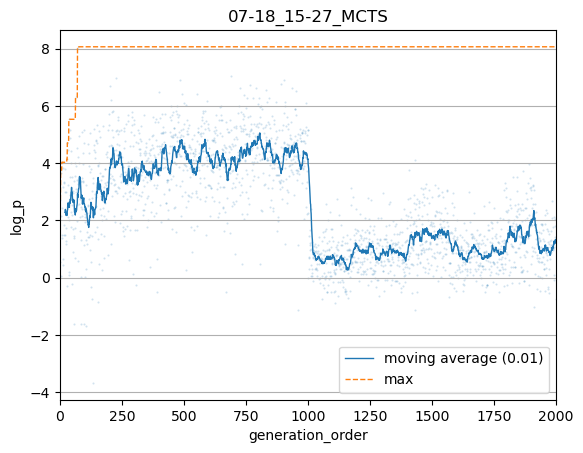

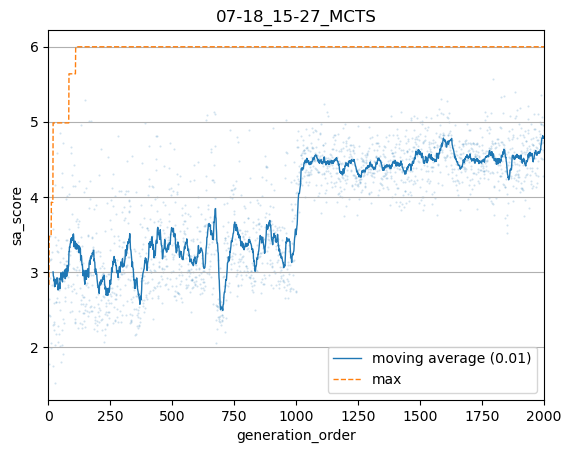

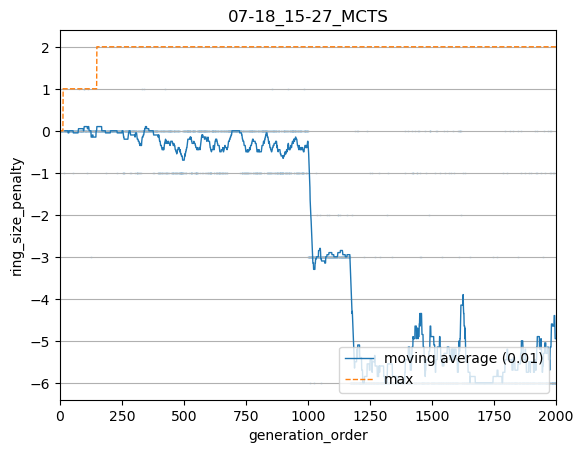

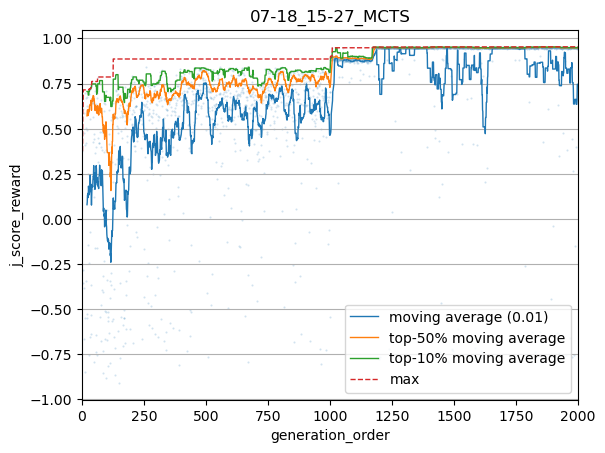

number of generated nodes: 2000
valid rate: 1.0
unique rate: 0.999000999000999
node_per_sec: 78.70108267878318
best_reward: 0.9540714003722115
average_reward: 0.6689307584057157
top_10_auc: 0.1717541150654921


In [10]:
# start generation

yaml_path_1 = "config/chain/de_novo_rnn.yaml"
yaml_path_2 = "config/chain/lead_jensen.yaml"

conf_1 = conf_from_yaml(yaml_path_1, repo_root)
conf_2 = conf_from_yaml(yaml_path_2, repo_root)

generator_1 = generator_from_conf(conf_1, repo_root)
generator_1.generate(max_generations=conf_1.get("max_generations"), time_limit=conf_1.get("time_limit"))
best_key = generator_1.top_k(k=1)[0][0]

conf_2["root"] = best_key
if not "reward_class" in conf_2:
    conf_2["reward_class"] = conf_1["reward_class"]
    conf_2["reward_args"] = conf_1.get("reward_args", {})
generator_2 = generator_from_conf(conf_2)
generator_2.inherit(generator_1)
generator_2.generate(max_generations=conf_2.get("max_generations"), time_limit=conf_2.get("time_limit"))

generator_2.plot(**conf_2.get("plot_args", {}))
generator_2.analyze()

# queue_generations(c1, c2)

In [ ]:
# continue generation
generator_2.generate(time_limit=100, max_generations=100)
generator_2.plot(**conf_2.get("plot_args", {}))
generator_2.analyze()

In [ ]:
#save mcts
save_path = generator_2.output_dir() + "save.mcts"
generator_2.save(save_path)

In [ ]:
#load generator and yaml
from generator import Generator
load_dir = "generation_result/06-26_08-51/"
conf_3 = conf_from_yaml("sandbox/" + load_dir + "setting.yaml", repo_root)
generator_3 = generator_from_conf(conf_3, repo_root)
generator_3 = Generator.load(load_dir + "save.mcts", generator_3.transition)